In [166]:
import sys

sys.path.append("...")

import Essentials
import Visualizer_pred

In [167]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
from sklearn.tree import plot_tree

In [168]:
data_archive = np.load('Data_First_Nikita.npz', allow_pickle=True)

In [169]:
def prepare_Y(y):
    timestamp = y[:, 1]
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

ALL_column_names_1 = data_archive['column_names_1']
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

ALL_column_names_2 = data_archive['column_names_2_cat']
all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

ALL_column_names_3 = data_archive['column_names_3_cat']
all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

column_names_2 = data_archive['column_names_2']
x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

column_names_3 = data_archive['column_names_3']
x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

df_X1 = pd.read_csv(r'raw_X1.csv', index_col=0)
df_X2 = pd.read_csv(r'raw_X2.csv', index_col=0)
df_X3 = pd.read_csv(r'raw_X3.csv', index_col=0)
df_Y1 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y2 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y3 = pd.read_csv(r'raw_Y1.csv', index_col=0)

x_train, x_test, y_train, y_test=train_test_split(all_X_1, all_Y_1, test_size=0.2, random_state=42)

y_train, timestamp_train = prepare_Y(y_train)
sorted_indices_train = np.argsort(timestamp_train)
y_train = y_train[sorted_indices_train]
timestamp_train = timestamp_train[sorted_indices_train]
x_train = x_train[sorted_indices_train]

y_test, timestamp_test = prepare_Y(y_test)

x_test1, x_val, y_test1, y_val, timestamp_test1, timestamp_val = train_test_split(
    x_test, y_test, timestamp_test, test_size=0.5, random_state=42
)

sorted_indices_test = np.argsort(timestamp_test)
y_test = y_test[sorted_indices_test]
timestamp_test = timestamp_test[sorted_indices_test]
x_test = x_test[sorted_indices_test]


x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_3, y_winter_half_3, test_size=0.2, random_state=42)
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_3, y_summer_half_3, test_size=0.2, random_state=42)

y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)
sorted_indices_train_summer = np.argsort(timestamp_train_summer)
y_train_summer = y_train_summer[sorted_indices_train_summer]
timestamp_train_summer = timestamp_train_summer[sorted_indices_train_summer]
x_train_summer = x_train_summer[sorted_indices_train_summer]

y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)
sorted_indices_train_winter = np.argsort(timestamp_train_winter)
y_train_winter = y_train_winter[sorted_indices_train_winter]
timestamp_train_winter = timestamp_train_winter[sorted_indices_train_winter]
x_train_winter = x_train_winter[sorted_indices_train_winter]

y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)
sorted_indices_test_summer = np.argsort(timestamp_test_summer)
y_test_summer = y_test_summer[sorted_indices_test_summer]
timestamp_test_summer = timestamp_test_summer[sorted_indices_test_summer]
x_test_summer = x_test_summer[sorted_indices_test_summer]

y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)
sorted_indices_test_winter = np.argsort(timestamp_test_winter)
y_test_winter = y_test_winter[sorted_indices_test_winter]
timestamp_test_winter = timestamp_test_winter[sorted_indices_test_winter]
x_test_winter = x_test_winter[sorted_indices_test_winter]

column_names_X1 = df_X1.columns.tolist()
column_names_X2 = df_X2.columns.tolist()
column_names_X3 = df_X3.columns.tolist()
column_name_Y1 = 'Давление насыщенных паров в зимний период'
column_name_Y2 = 'Конец кипения легкого бензина'
column_name_Y3 = 'Содержание олефинов в продукте'

column_names_X1.pop()
column_names_X2.pop()
column_names_X3.pop()

feature_names_1 = column_names_X1
feature_names_2 = column_names_X2
feature_names_3 = column_names_X3

target_name_1 = column_name_Y1
target_name_2 = column_name_Y2
target_name_3 = column_name_Y3

In [170]:
class RandomForest(Essentials.SoftSensor):
    def __init__(self, x_train, y_train, **kwargs):
        super().__init__('Test')
        self.parameters = kwargs
        self.model = RandomForestRegressor(**self.parameters)
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)
        
    
    def preprocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
    def postprocessing(self, x):
        return x
                
    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions.reshape(-1, 1)

    def train(self, x_train, y_train):
        x_train = self.preprocessing(x_train)
        self.model.fit(x_train, y_train)
        self.set_model(self.model)

    def tree_viz(self, feature_names):
        random_tree = self.model.estimators_[0]
        plt.figure(figsize=(100, 80))
        plot_tree(random_tree, feature_names=feature_names, class_names=None, filled=True)
        plt.show()
        plt.savefig('decision_tree.png')
        
    def __str__(self):
        pass
    def predict(self, x):
        return self.evaluate_model(self.preprocessing(x))

In [171]:
test_soft_sensor = RandomForest(x_train, y_train, n_estimators=1000, max_depth=3, min_samples_split= 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2992\2044458191.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(x_train, y_train)


In [172]:
metric = Essentials.R2Metric()

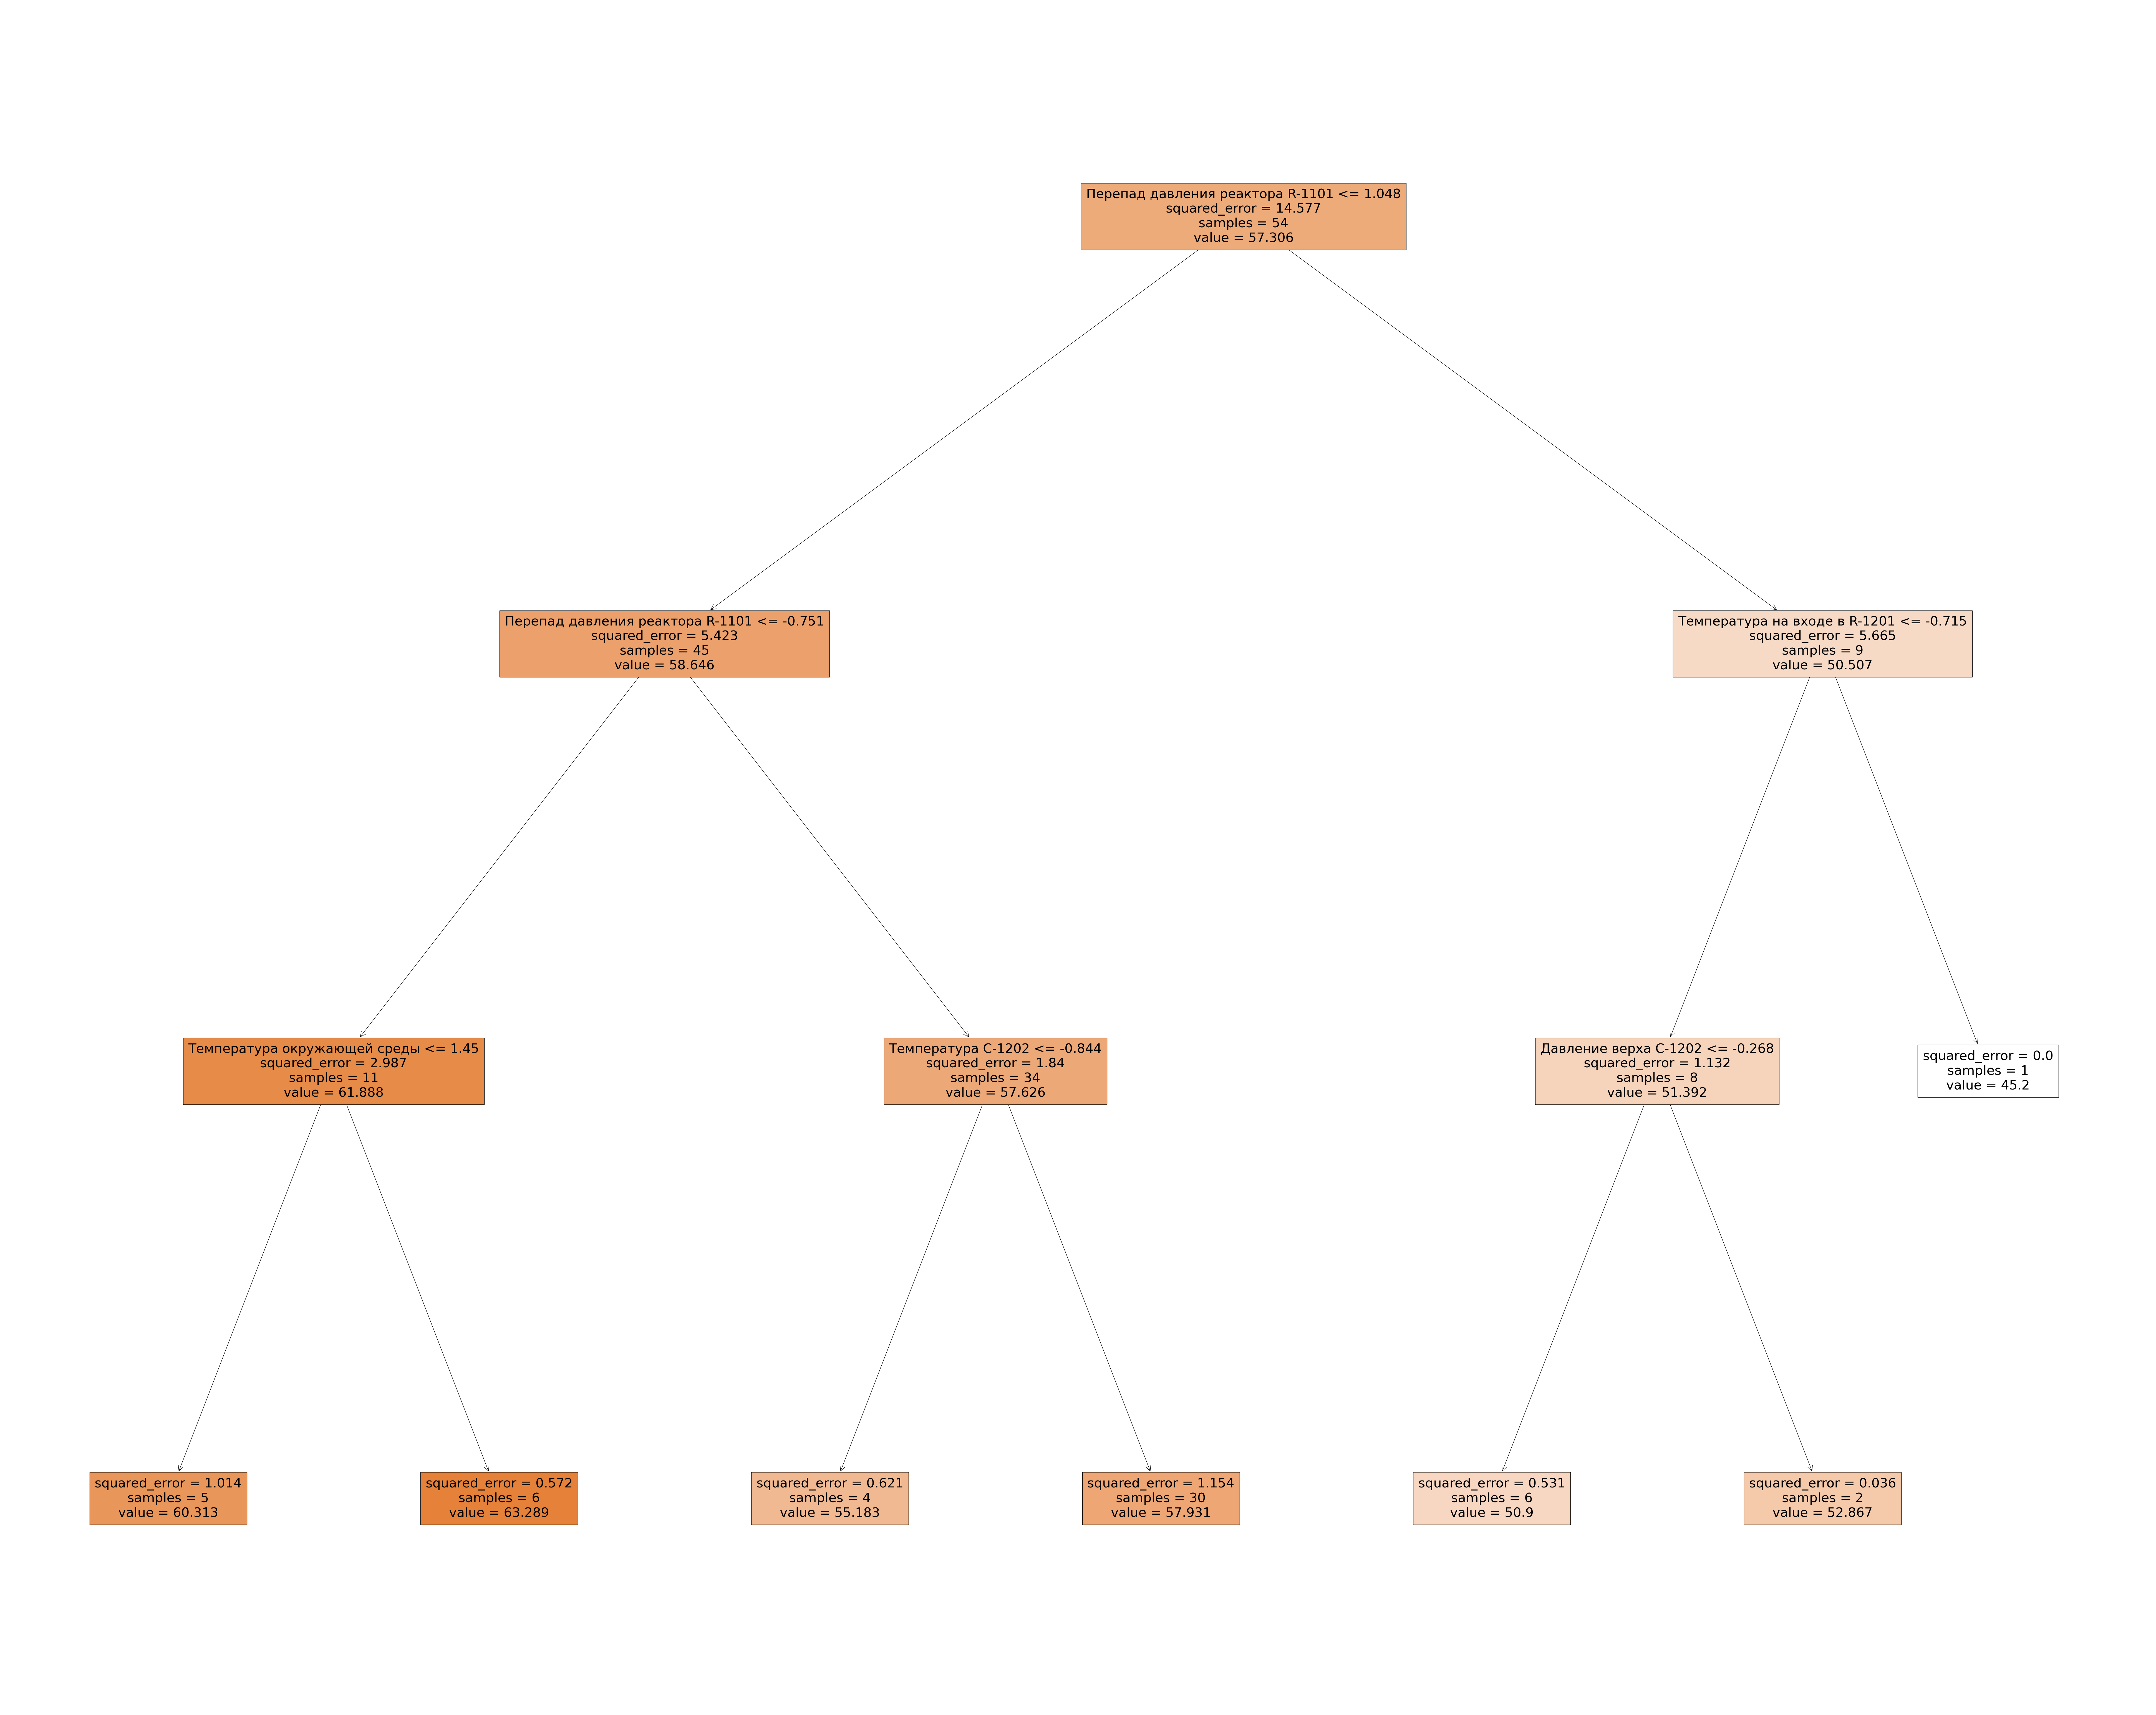

<Figure size 640x480 with 0 Axes>

In [173]:
test_soft_sensor.tree_viz(feature_names_1)

In [174]:
test_soft_sensor.test(x_test, y_test, metric)

(array([[57.70514266],
        [57.49918982],
        [57.97024547],
        [58.10249642],
        [57.8988508 ],
        [57.99723233],
        [57.97182533],
        [62.76720802],
        [58.2475942 ],
        [58.53528971],
        [59.53095374],
        [57.95235794],
        [58.21734757],
        [58.03864539],
        [57.51605154],
        [52.99453106],
        [53.08717299],
        [52.36011113],
        [51.80737174],
        [59.30214944],
        [59.11092771],
        [57.58223064]]),
 0.6712867231311501)

In [175]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'RandomForest SoftSensor R2 metric on Test')

      Coefficient of determination
Test                      0.671287


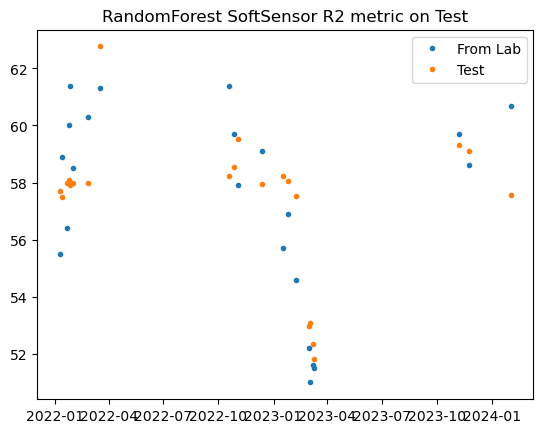

In [176]:
test_visual.visualize([test_soft_sensor])

In [177]:
PCA_LR_test_visual_train = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'RandomForest SoftSensor R2 metric on Train')

In [178]:
test_visual=Visualizer_pred.Visualizer(x_test, y_test, timestamp_test,[metric], 'Test Random Forest Sensor R2 metric')

+------+--------------------------------+---------+
|      |   Coefficient of determination |     MSE |
+======+================================+=========+
| Test |                       0.671287 | 3.64468 |
+------+--------------------------------+---------+


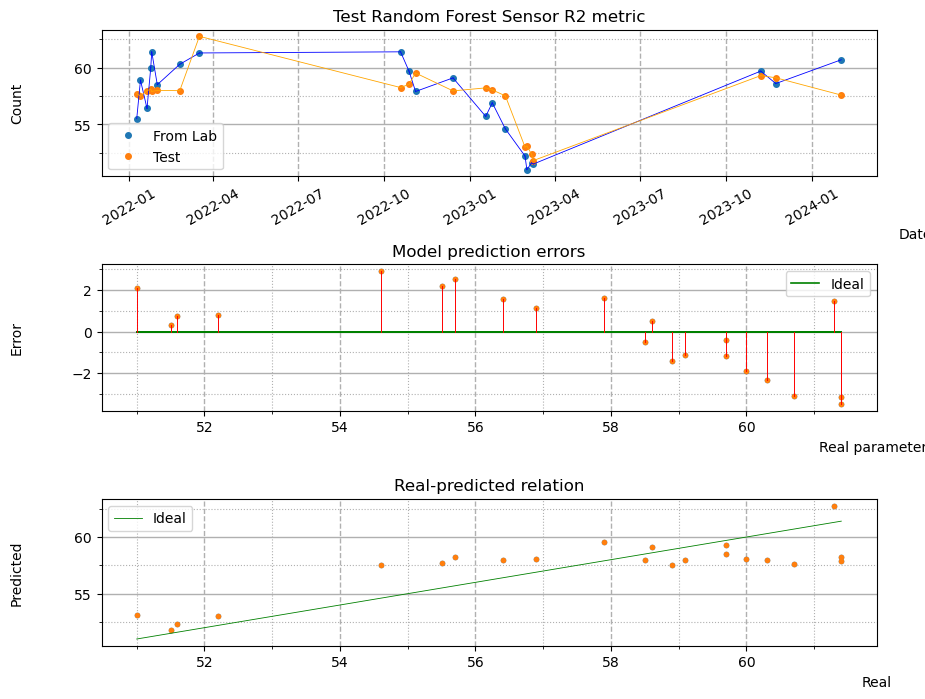

In [179]:
test_visual.visualize([test_soft_sensor], lines=True, lines_vertical=True)